In [2]:
#imported libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
#reading our dataset
data=pd.read_csv('Housing.csv') 

In [4]:
#quick overview of the dataset
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
data.shape

(545, 13)

In [8]:
data.columns.tolist()

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [9]:
#to check for null values in dataset
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
#it gives us the unique values in dataset
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [11]:
original_df=pd.DataFrame(data)

#creating a copy of it
copyData=original_df.copy()

In [12]:
copyData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [13]:
from pandas_profiling import ProfileReport
profile=ProfileReport(copyData, explorative=True, dark_mode=True) 
profile.to_file('eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

 ## Feature Engineering
 1. Create new features that might be useful for predicting house prices.
 2. Perform feature scaling if necessary.
 3. Encode categorical variables appropriately.
 ## Model Building
 1. Split the dataset into training and testing sets.
 2. Train at least three different regression models
 3. Evaluate the models using appropriate metrics (e.g., Mean Absolute Error,
 Mean Squared Error, R-squared).
 4. Select the best model based on evaluation metrics

In [14]:
#step-1, performing feature engineering!!

#will give info abput categorical and numerical columns
cat_col=copyData.select_dtypes(include=['object']).columns
num_col=copyData.select_dtypes(include=np.number).columns.tolist()
print("Cat columns")
print(cat_col) 
print("Num Columns")
print(num_col)

Cat columns
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')
Num Columns
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [15]:
#first of all we will be going to perform label encoding in categorical variables

from sklearn.preprocessing import LabelEncoder
col_TO_be_encoded=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
label_encoder={}
for features in col_TO_be_encoded:
    le=LabelEncoder()
    copyData[features]=le.fit_transform(copyData[features])
    label_encoder[features]=le
copyData.head()

#now we have all numerical data types


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [16]:
#creating a new feature 
copyData['bgbs'] = copyData['bedrooms'] + copyData['basement'] + copyData['stories'] + copyData['guestroom'] + copyData['bathrooms']
print(copyData.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  bgbs  
0                 0     9  
1                 0    12  
2                 1     8  
3                 0     9  
4                 

In [17]:
#now, droping columns bedroom, bathroom, stories and guestroom
copyData=copyData.drop(columns=['bedrooms', 'bathrooms', 'stories', 'guestroom', 'basement'])
copyData.head()

,price,area,mainroad,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bgbs
0,13300000,7420,1,0,1,2,1,0,9
1,12250000,8960,1,0,1,3,0,0,12
2,12250000,9960,1,0,0,2,1,1,8
3,12215000,7500,1,0,1,3,1,0,9
4,11410000,7420,1,0,1,2,0,0,9


In [18]:
profile=ProfileReport(copyData, explorative=True, dark_mode=True) 
profile.to_file('eda_updated.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
# Separate features and target
x = copyData.drop('price', axis=1)
y = copyData['price'] #target variables


In [20]:
#step-04, model building
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [42]:
print("xtrain shape", x_train.shape)
print("x_test", x_test.shape)

xtrain shape (436, 8)
x_test (109, 8)


In [21]:
from sklearn.preprocessing import StandardScaler #standardication bs training data pr  hogi, wrna data leakage ki bt ho jaygi and output feature ko nhi krna standardize
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train) #output data pr nhi krte standardize


In [22]:
x_test=scaler.transform(x_test)


In [43]:
x_train_final=scaler.fit_transform(x_train)
x_test_final=scaler.transform(x_test)

In [38]:
x_test_original = scaler.inverse_transform(x_test)


In [23]:
from sklearn.linear_model import LinearRegression
#cross validation
from sklearn.model_selection import cross_val_score

In [44]:
regression=LinearRegression()
regression.fit(x_train_final, y_train)

LinearRegression()

In [25]:
mse= cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
mse

array([-1.02229224e+12, -1.27807930e+12, -2.11082872e+12, -1.12251783e+12,
       -1.11675927e+12, -1.39284330e+12, -1.32155685e+12, -1.67237520e+12,
       -9.58040931e+11, -9.88765615e+11])

In [26]:
np.mean(mse)

-1298405926538.2473

In [45]:
#prediction 
reg_pred=regression.predict(x_test_final)
reg_pred

array([4150929.89709443, 6508146.71960228, 4819313.83020717,
       7368044.68886908, 3307222.44566988, 6650446.61450808,
       3427017.23236644, 3326267.63353937, 3364089.30704155,
       8217882.43370827, 6477736.8890331 , 3907434.2057385 ,
       3943711.33621957, 4866725.92262064, 4179191.6520496 ,
       2154221.09111922, 3899509.30997997, 3770242.6082722 ,
       3413100.60408874, 4550083.25754348, 5573209.58709344,
       6148353.09082068, 4798311.26091344, 2824409.39471154,
       5552388.93578232, 5407605.97939867, 5582554.41576277,
       5624751.92314077, 4740987.68426693, 6089932.27264952,
       3167866.15003689, 6452794.91749261, 7402171.40834498,
       2824837.98728249, 4681841.84219682, 5033114.92723013,
       5485369.98103546, 3836993.83426858, 2522057.45194288,
       4215427.23742414, 7671025.50697488, 4953758.08310415,
       6008211.4854526 , 3802653.16259562, 4017307.3574064 ,
       5892025.11438022, 4749523.71592632, 2591653.16568029,
       4330528.11715218,

In [39]:
#prediction 
reg_pred=regression.predict(x_test_original)
reg_pred

array([2.21289343e+09, 5.30892607e+09, 1.91622718e+09, 7.27981207e+09,
       2.02563959e+09, 3.50976145e+09, 2.12934064e+09, 1.92613280e+09,
       1.94249939e+09, 4.97056404e+09, 3.31735389e+09, 2.19065742e+09,
       1.91031073e+09, 3.34810845e+09, 3.30585259e+09, 1.34663589e+09,
       2.70822642e+09, 3.32437563e+09, 1.71737745e+09, 2.48739883e+09,
       4.49986133e+09, 3.56354306e+09, 2.76371555e+09, 9.45452259e+08,
       3.54706486e+09, 1.74642214e+09, 3.86562027e+09, 3.13922360e+09,
       1.82920004e+09, 3.54634294e+09, 2.43151592e+09, 1.26405548e+09,
       4.63847956e+09, 2.23303514e+09, 1.72863820e+09, 3.55597907e+09,
       3.31603256e+09, 1.68227641e+09, 1.90747992e+09, 1.20885401e+09,
       4.69440505e+09, 3.26116261e+09, 3.20643717e+09, 3.03576683e+09,
       1.94786478e+09, 3.31603352e+09, 2.30160238e+09, 2.23283143e+09,
       2.23879572e+09, 3.15092416e+09, 2.67538168e+09, 5.33715050e+09,
       9.18516461e+08, 2.12836808e+09, 3.24727622e+09, 3.15964231e+09,
      

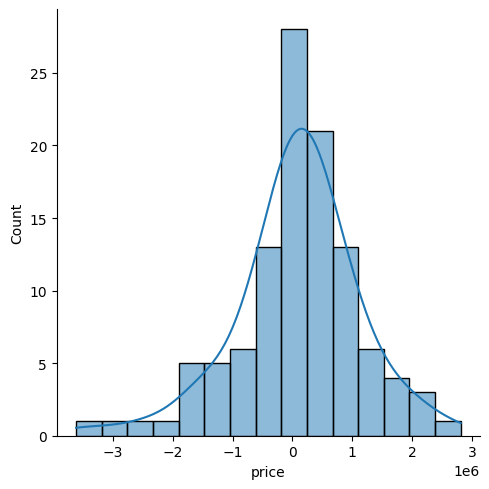

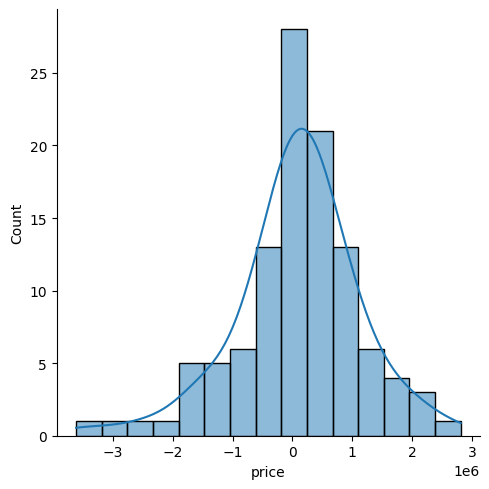

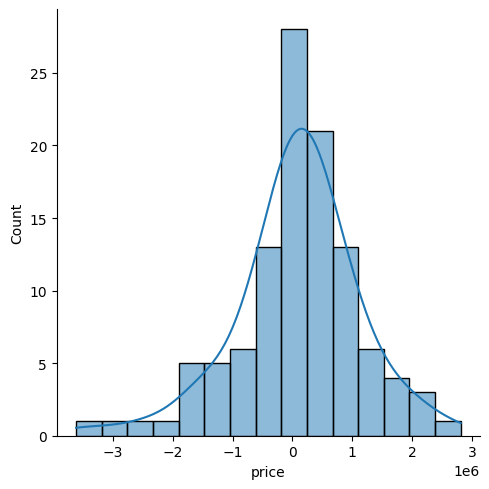

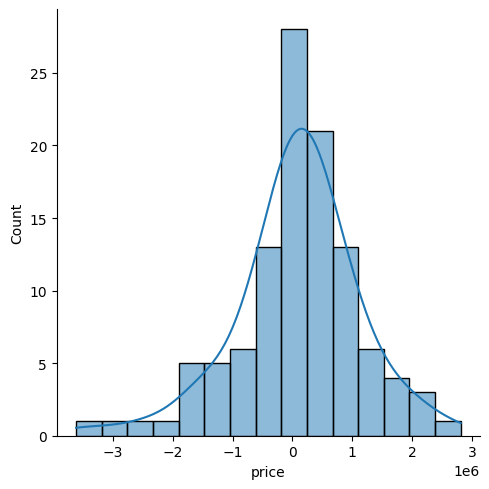

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Assuming reg_pred and y_test are already defined
sns.displot(reg_pred - y_test, kde=True)
plt.show()


In [32]:
from sklearn.metrics import r2_score

In [33]:
score=r2_score(reg_pred, y_test)

<Axes: xlabel='price'>

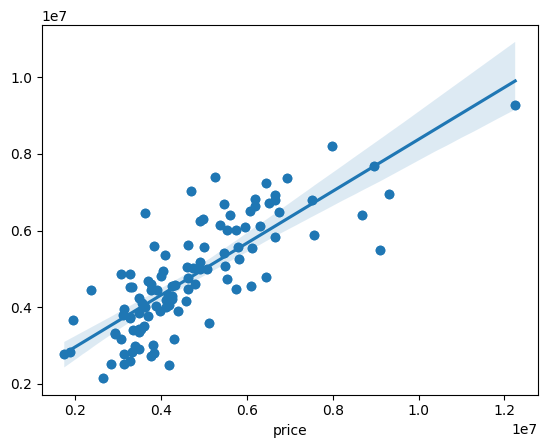

In [46]:

plt.scatter(y_test,reg_pred)
sns.regplot(x=y_test,y=reg_pred)

In [34]:
score

0.48753848866721594

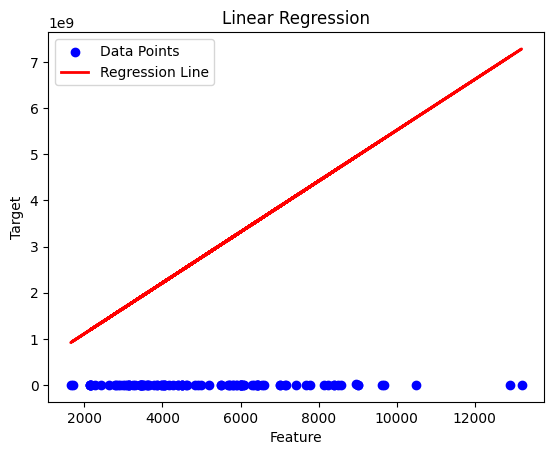

In [41]:
# Select the first feature from X_test for visualization
X_test_feature = x_test_original[:, 0]  # Assuming X_test is a 2D array

# Plot the data points
plt.scatter(X_test_feature, y_test, color='blue', label='Data Points')

# Plot the regression line
plt.plot(X_test_feature, reg_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and legend
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()

# Show the plot
plt.show()